In [1]:
maxiter = 20000

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import gpitch.myplots as mplt
import numpy as np
import gpflow
import gpitch
import time
import tensorflow as tf
# from gpitch.models import GpitchModel
from gpitch.transcription_svi import AmtSvi

In [4]:
path_test = '/import/c4dm-01/MAPS_original/AkPnBcht/MUS/'
path_train = '/import/c4dm-01/MAPS_original/AkPnBcht/ISOL/NO/'
path_load = '/import/c4dm-04/alvarado/results/amt/params/'
fname = 'MAPS_MUS-bach_846_AkPnBcht.wav'

In [5]:
path = [path_train, path_test, path_load]
frames = [88200, 20*44100]  # train and test number of frames

In [6]:
# pitches = range(60, 77)
m = AmtSvi(test_fname=fname, frames=frames, path=path)
m.model.za.fixed = True
m.model.zc.fixed = True
print("number of induncing variables: {0}".format(len(m.model.za[0].value)))

number of induncing variables: 859


In [7]:
m.pitches

[59, 60, 62, 64, 66, 67, 69, 72, 74, 76, 77, 81]

(-0.5, 399.5, 87.5, -0.5)

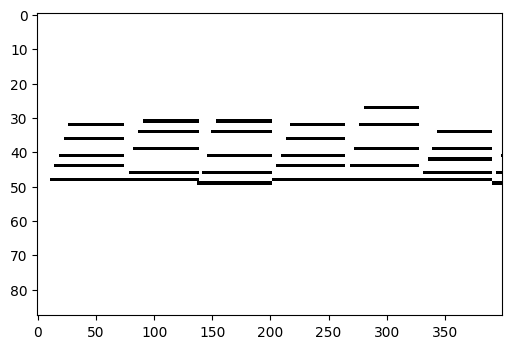

In [80]:
plt.figure()
plt.imshow(m.piano_roll.matrix, cmap=plt.cm.get_cmap('binary'))
plt.axis("auto")

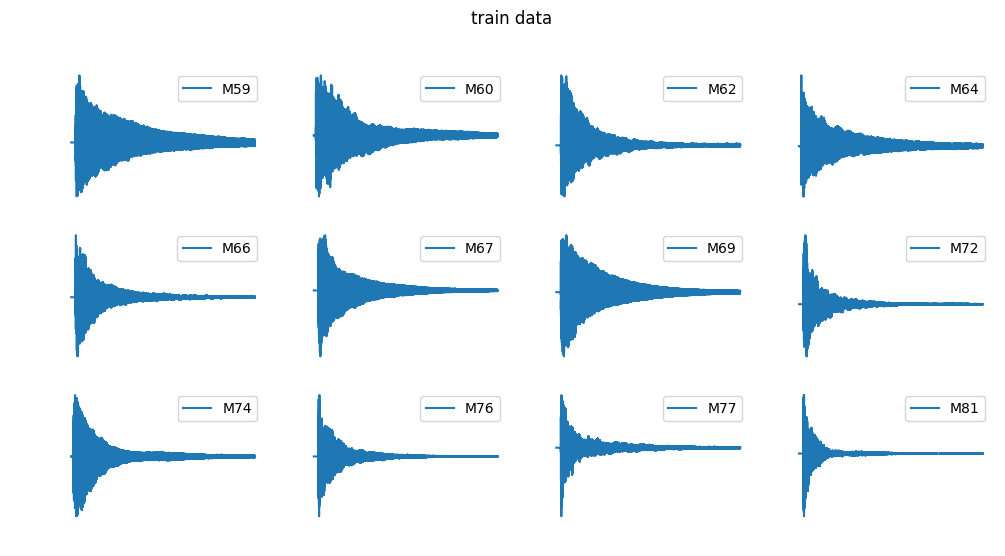

In [9]:
m.plot_data_train()

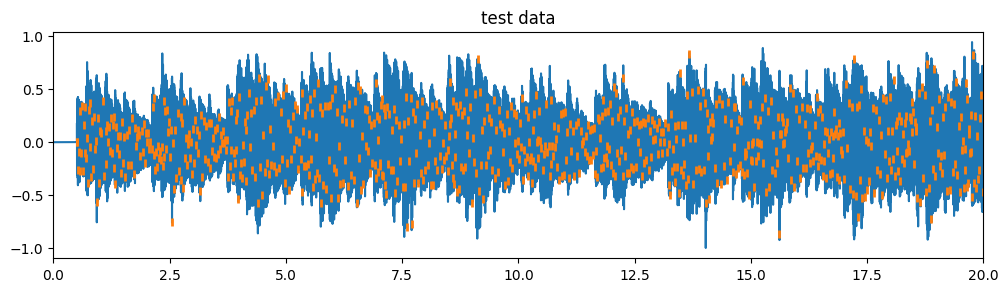

In [ ]:
m.plot_data_test()

In [ ]:
m.optimize(maxiter=maxiter, learning_rate=0.005)

In [102]:
def compute_piano_roll(sources):
    win = signal.hann(2050)
    d = len(sources)
    aux1 = []
    aux2 = []
    for i in range(d):
        aux1.append(np.abs(sources[i]))
        aux2.append(signal.convolve(aux1[i].reshape(-1), win, mode='same')/win.size)
    return aux2

In [103]:
from scipy import signal

In [104]:
pianor = compute_piano_roll(m.prediction[-1])

In [105]:
pianor2 = np.asarray(pianor, order='F').reshape(12, -1)

In [106]:
pianor2.shape

(12, 882000)

In [117]:
def plot_pianor(pianor, xlim, figsize):
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(pianor[:, ::2205], 
              cmap=plt.cm.get_cmap('binary'), 
              interpolation="none", 
              extent=[xlim[0], xlim[1], 21, 108], 
              aspect="auto",
             origin="lower")

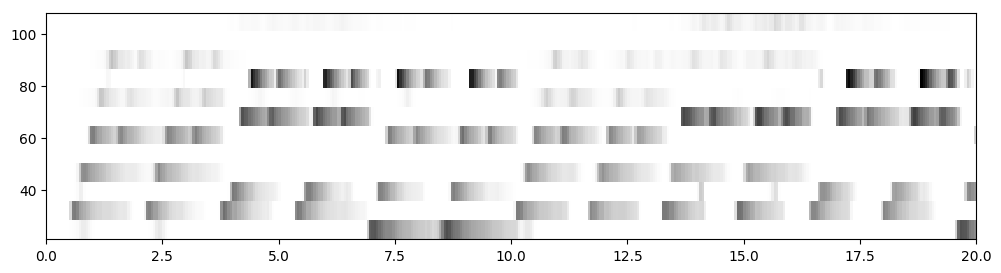

In [118]:
plot_pianor(pianor2, [0, 20], (12, 3))

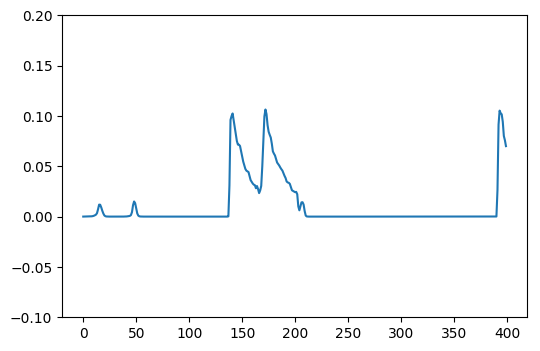

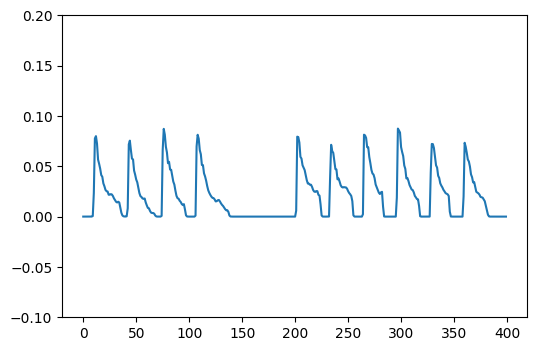

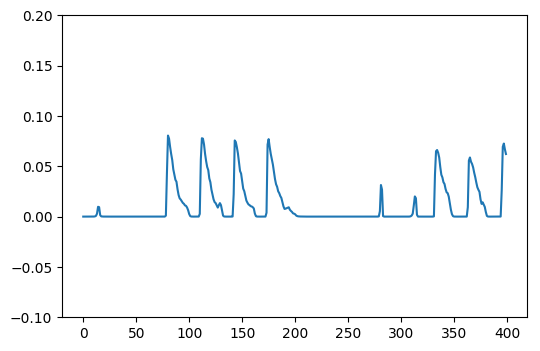

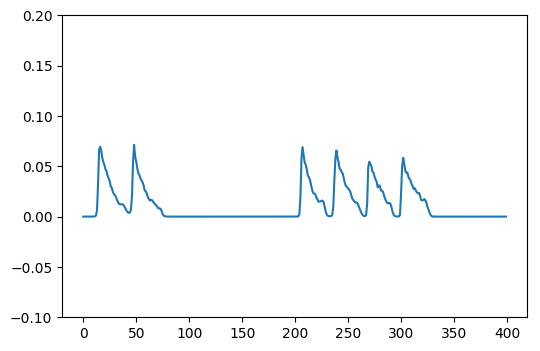

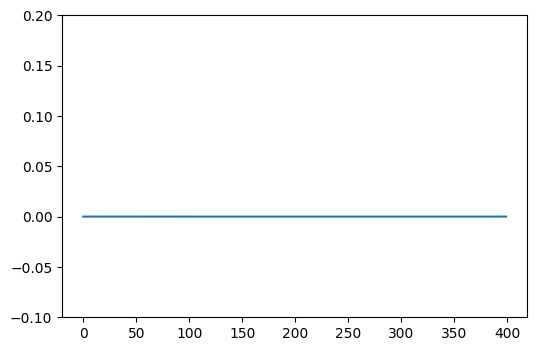

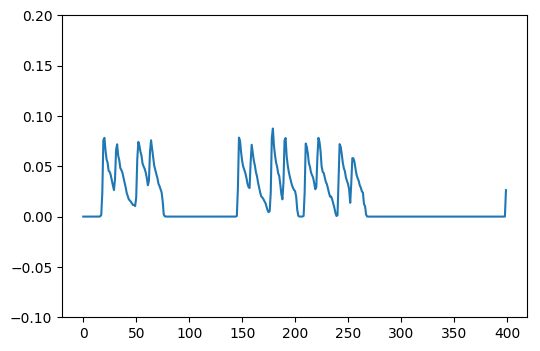

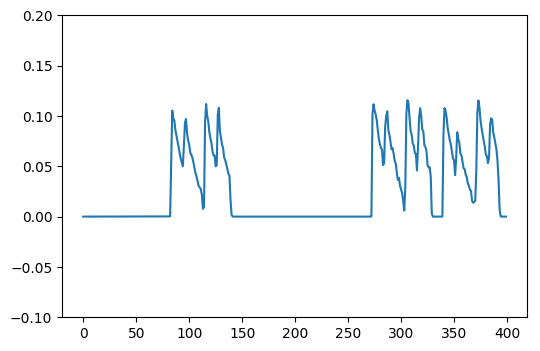

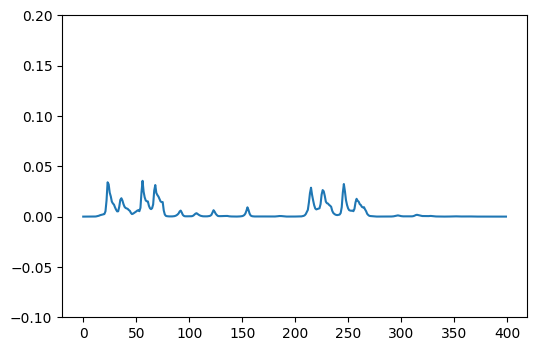

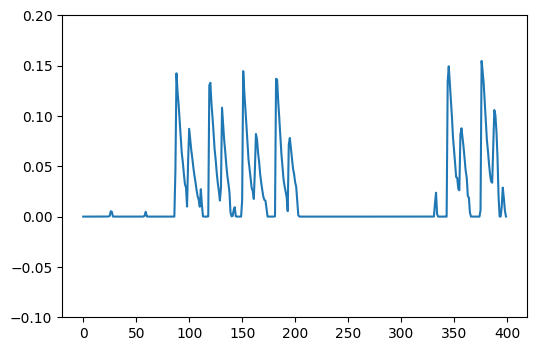

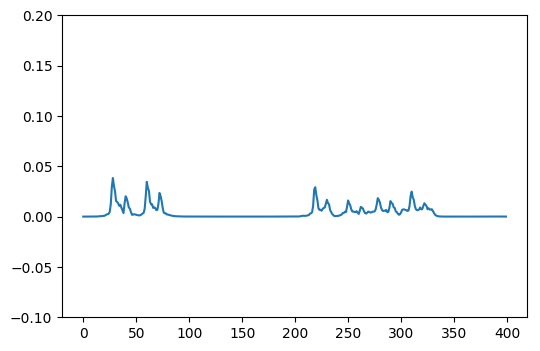

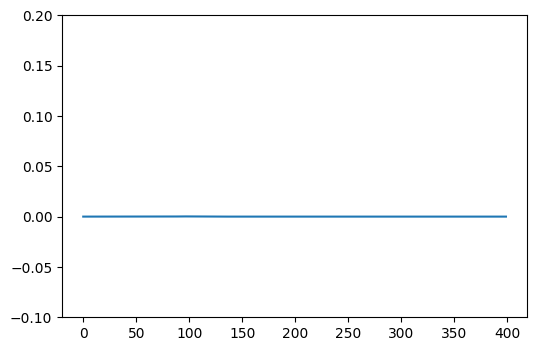

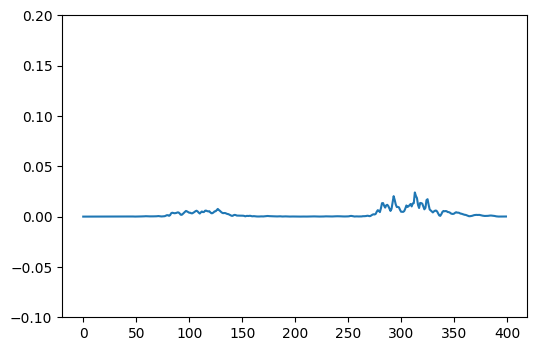

In [119]:
for i in range(len(m.pitches)):
    plt.figure()
    plt.plot(pianor[i][::2205])
    plt.ylim(-0.1, 0.2)

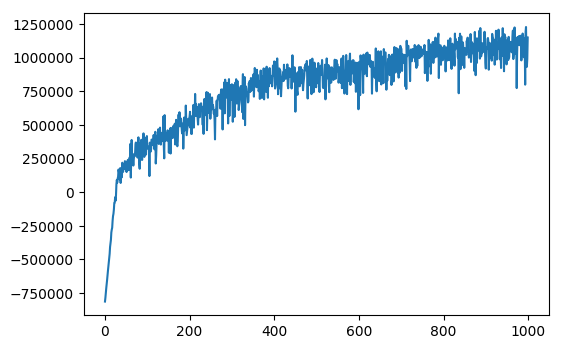

In [93]:
plt.plot(m.logger.array())

In [16]:
m.predict()

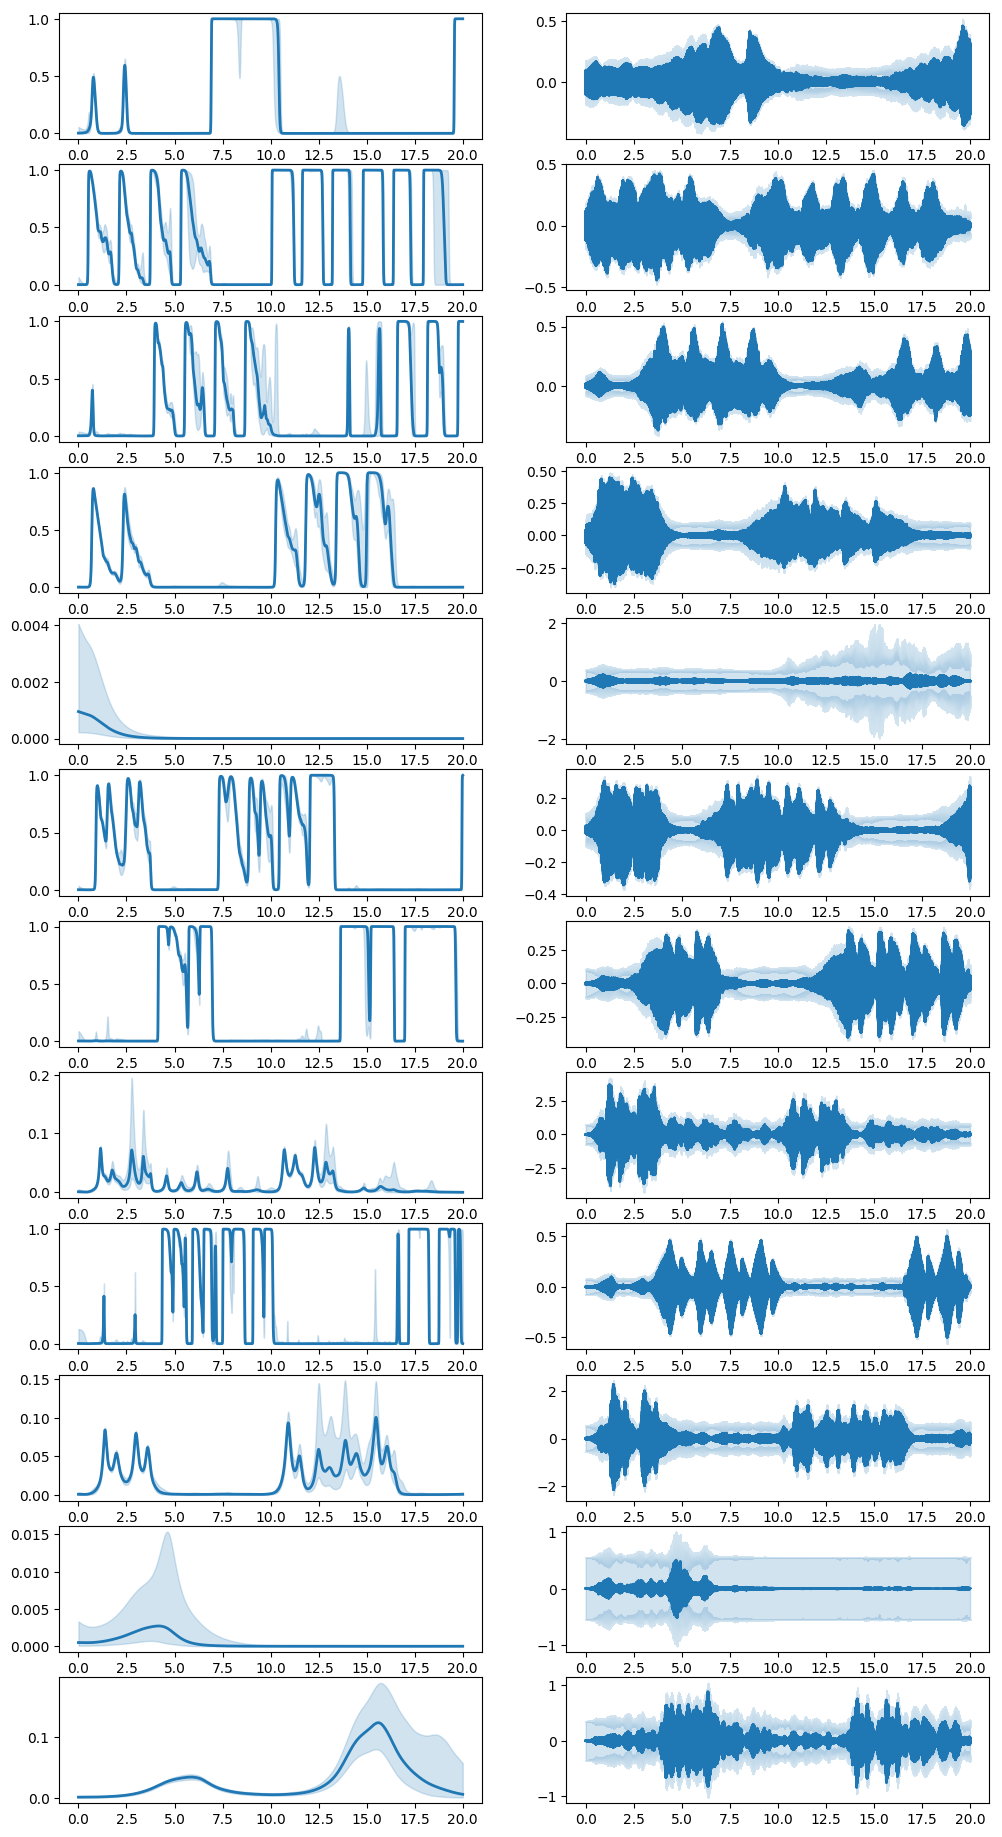

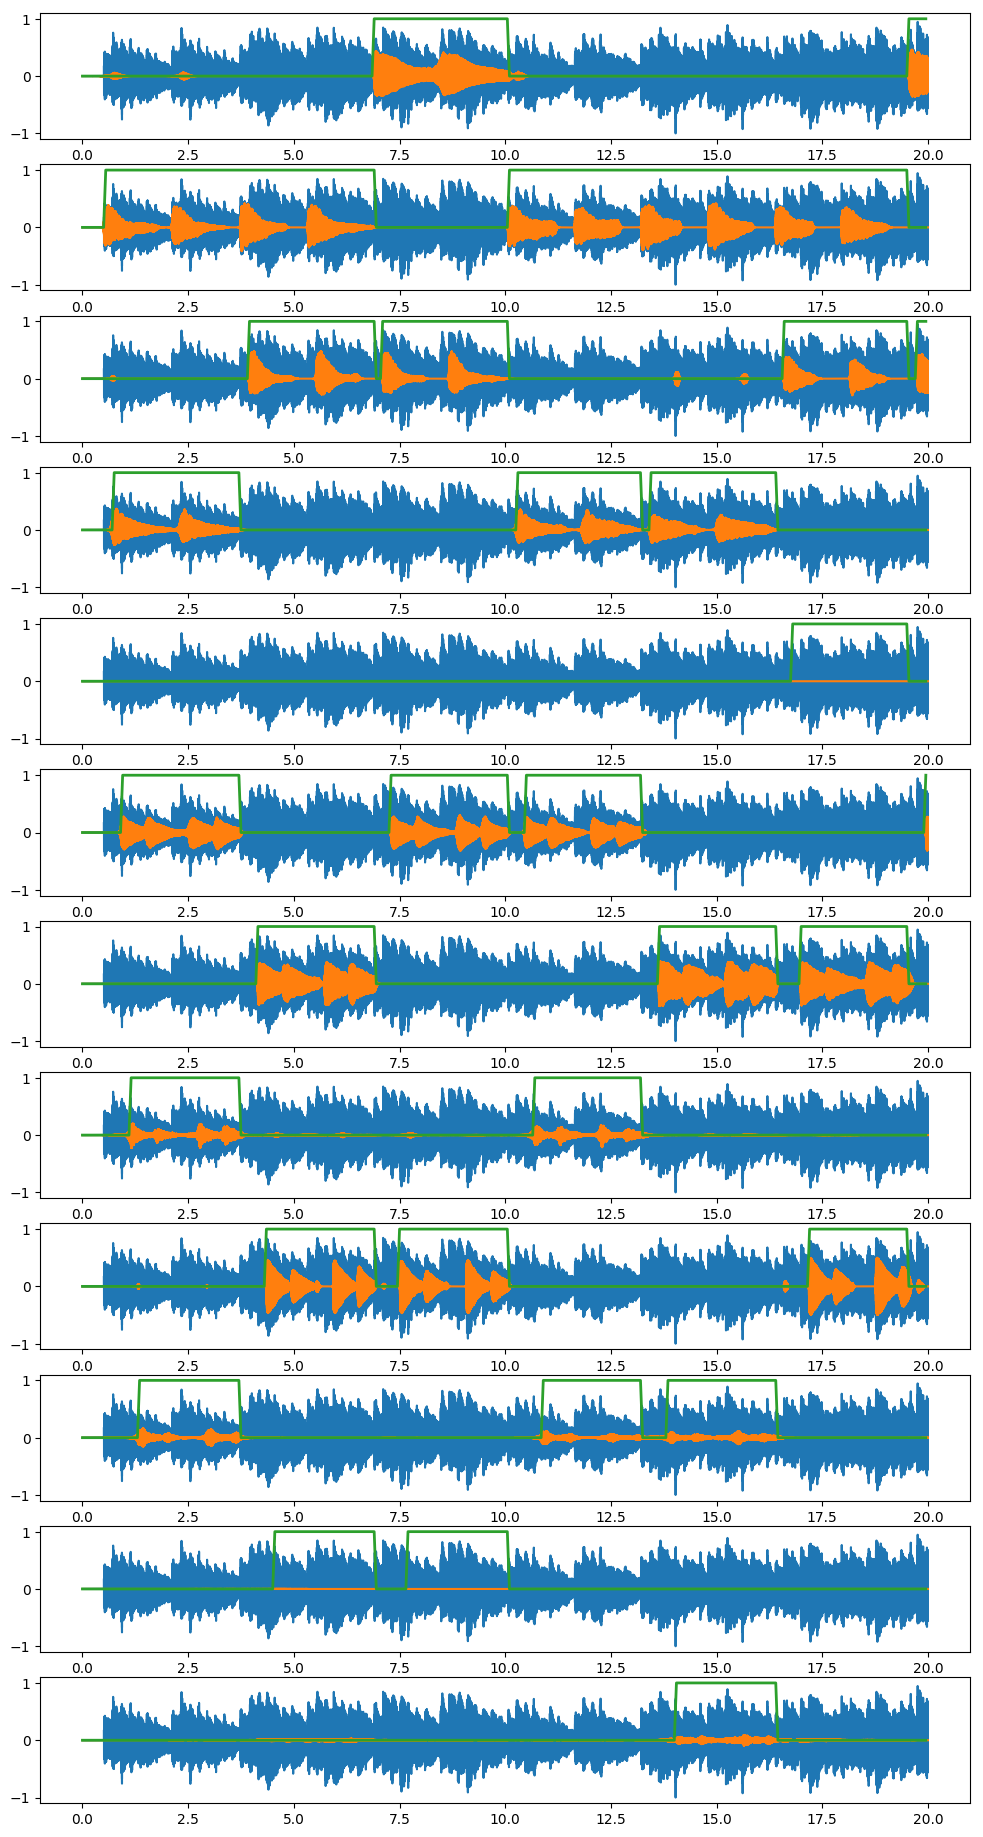

In [17]:
m.plot_results()